In [ ]:
#Import Libary.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#This code Ensure kagglehub is up-to-date.
!pip install --upgrade kagglehub


In [ ]:
# This Downloads the Amazon product reviews dataset using kagglehub.
import kagglehub

#This Downloads the latest version from kaggle.
path = kagglehub.dataset_download("arhamrumi/amazon-product-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-product-reviews


In [ ]:
#This Checks the contents of the downloaded dataset folder.
import os
print(os.listdir(path))

['Reviews.csv']


In [ ]:
#Load the Reviews.csv file into a DataFrame.
reviews_df = pd.read_csv(os.path.join(path,'Reviews.csv'))
reviews_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
#This Drop columns we don’t need to focus on as it does not provide useful information
reviews_df = reviews_df.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time'],axis=1)
reviews_df

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...
568449,5,Will not do without,Great for sesame chicken..this is a good if no...
568450,2,disappointed,I'm disappointed with the flavor. The chocolat...
568451,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,5,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
# This converts all review text to lowercase for consistency.
reviews_df['Text'] = reviews_df['Text'].str.lower()
reviews_df['Summary'] = reviews_df['Summary'].str.lower()
reviews_df


,Score,Summary,Text
0,5,good quality dog food,i have bought several of the vitality canned d...
1,1,not as advertised,product arrived labeled as jumbo salted peanut...
2,4,"""delight"" says it all",this is a confection that has been around a fe...
3,2,cough medicine,if you are looking for the secret ingredient i...
4,5,great taffy,great taffy at a great price. there was a wid...
...,...,...,...
568449,5,will not do without,great for sesame chicken..this is a good if no...
568450,2,disappointed,i'm disappointed with the flavor. the chocolat...
568451,5,perfect for our maltipoo,"these stars are small, so you can give 10-15 o..."
568452,5,favorite training and reward treat,these are the best treats for training and rew...


In [ ]:
#This Removes punctuations, special characters, and extra spaces.
import re

def clean_punctuation(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# This Handles NaN values before applying text cleaning.
reviews_df['Text'] = reviews_df['Text'].fillna('')
reviews_df['Summary'] = reviews_df['Summary'].fillna('')

# This Applies the cleaning function to the 'Text' and 'Summary' columns.
reviews_df['Text'] = reviews_df['Text'].apply(clean_punctuation)
reviews_df['Summary'] = reviews_df['Summary'].apply(clean_punctuation)

reviews_df


,Score,Summary,Text
0,5,good quality dog food,i have bought several of the vitality canned d...
1,1,not as advertised,product arrived labeled as jumbo salted peanut...
2,4,delight says it all,this is a confection that has been around a fe...
3,2,cough medicine,if you are looking for the secret ingredient i...
4,5,great taffy,great taffy at a great price there was a wide ...
...,...,...,...
568449,5,will not do without,great for sesame chickenthis is a good if not ...
568450,2,disappointed,im disappointed with the flavor the chocolate ...
568451,5,perfect for our maltipoo,these stars are small so you can give of those...
568452,5,favorite training and reward treat,these are the best treats for training and rew...


In [ ]:
#This removes the stopwords from our dataset
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

reviews_df['Text'] = reviews_df['Text'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in stop_words]
))

reviews_df['Summary'] = reviews_df['Summary'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in stop_words]
))

reviews_df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Score,Summary,Text
0,5,good quality dog food,bought several vitality canned dog food produc...
1,1,advertised,product arrived labeled jumbo salted peanutsth...
2,4,delight says,confection around centuries light pillowy citr...
3,2,cough medicine,looking secret ingredient robitussin believe f...
4,5,great taffy,great taffy great price wide assortment yummy ...
...,...,...,...
568449,5,without,great sesame chickenthis good better resturant...
568450,2,disappointed,im disappointed flavor chocolate notes especia...
568451,5,perfect maltipoo,stars small give one training session tried tr...
568452,5,favorite training reward treat,best treats training rewarding dog good groomi...


In [ ]:
# This gets the English stopwords for cleaning out common, non-informative words.
stop_words = set(stopwords.words('english'))
print(stop_words)

{"mustn't", "they'd", 'll', "didn't", 'who', 'don', 'hadn', 'have', 'of', "i've", 'hasn', 'how', 'are', "i'll", "they've", "he'd", 'such', 'yourselves', 'didn', 'below', 'does', 'which', 'be', 'same', 'but', 'until', 'these', 'than', 'haven', 'whom', 'needn', 'ma', 'they', "you've", 're', "i'm", 'from', "needn't", 'off', "doesn't", 'further', 'against', 'had', 'more', 'was', 'been', 'some', 'and', 'ourselves', 'through', 'other', 'by', "hasn't", 'both', "it'll", 'for', "i'd", 'why', "wouldn't", 'where', "they're", 'nor', 's', 'being', 'wasn', 'ain', 'during', 'shouldn', "you'll", 'at', 'me', 'their', 'm', 't', 'won', 'this', 'aren', 'herself', "won't", "she's", 'he', 'himself', 'them', "it'd", 'between', 'i', 'is', "isn't", 'or', 'so', "that'll", 'couldn', 'just', 'own', "wasn't", 'were', "don't", 'mustn', 'above', "it's", 'we', "we'd", 've', 'am', 'your', 'it', 'as', "couldn't", 'my', 'only', 'that', 'will', 'most', "should've", 'what', 'over', 'her', 'do', 'its', 'o', 'should', 'few'

In [ ]:
#This code splits the text into individual words using Word Tokenization.
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

reviews_df['Text'] = reviews_df['Text'].apply(word_tokenize)
reviews_df['Summary'] = reviews_df['Summary'].apply(word_tokenize)

reviews_df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Score,Summary,Text
0,5,"[good, quality, dog, food]","[bought, several, vitality, canned, dog, food,..."
1,1,[advertised],"[product, arrived, labeled, jumbo, salted, pea..."
2,4,"[delight, says]","[confection, around, centuries, light, pillowy..."
3,2,"[cough, medicine]","[looking, secret, ingredient, robitussin, beli..."
4,5,"[great, taffy]","[great, taffy, great, price, wide, assortment,..."
...,...,...,...
568449,5,[without],"[great, sesame, chickenthis, good, better, res..."
568450,2,[disappointed],"[im, disappointed, flavor, chocolate, notes, e..."
568451,5,"[perfect, maltipoo]","[stars, small, give, one, training, session, t..."
568452,5,"[favorite, training, reward, treat]","[best, treats, training, rewarding, dog, good,..."


In [ ]:
# This Downloads and unzips GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2025-04-14 17:01:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-14 17:01:27--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-14 17:01:27--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# This Loads Glove embeddings with 100 dimensions
import numpy as np

def load_glove_embeddings(file_path='glove.6B.100d.txt'):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_embeddings = load_glove_embeddings()
print("Loaded GloVe vectors:", len(glove_embeddings))

Loaded GloVe vectors: 400000


In [ ]:
# This turns each sentence into a single vector by averaging the word vectors
def sentence_to_vector(words, embeddings, dim=100):
    valid_words = [embeddings[word] for word in words if word in embeddings]
    if not valid_words:
        return np.zeros(dim)
    return np.mean(valid_words, axis=0)

#This creates vector representations for the 'Text' column
X_glove = np.array([sentence_to_vector(text, glove_embeddings) for text in reviews_df['Text']])
print("Shape of embedded feature matrix:", X_glove.shape)#


# This creates vector representations for the 'Summary' column
Y_glove = np.array([sentence_to_vector(summary, glove_embeddings) for summary in reviews_df['Summary']])
print("Shape of embedded feature matrix:", Y_glove.shape)


Shape of embedded feature matrix: (525814, 100)
Shape of embedded feature matrix: (525814, 100)


In [ ]:
#This creates the sentiment labels and applies to the 'Score' column
def label_sentiment(score):
    if score >= 4:
        return 1  # Positive
    elif score <= 2:
        return 0  # Negative
    else:
        return None

reviews_df['sentiment'] = reviews_df['Score'].apply(label_sentiment)
reviews_df = reviews_df.dropna(subset=['sentiment'])  # This line Removes neutral reviews

# The Features already embedded as X_glove, uses sentiments as labels
from sklearn.model_selection import train_test_split

X = X_glove
y = reviews_df['sentiment'].astype(int).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This builds a simple neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(128, input_shape=(100,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# This trains the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
10517/10517 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.8636 - loss: 0.3319 - val_accuracy: 0.8824 - val_loss: 0.2868
Epoch 2/5
10517/10517 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8772 - loss: 0.2993 - val_accuracy: 0.8817 - val_loss: 0.2857
Epoch 3/5
10517/10517 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.8797 - loss: 0.2929 - val_accuracy: 0.8820 - val_loss: 0.2846
Epoch 4/5
10517/10517 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.8814 - loss: 0.2900 - val_accuracy: 0.8847 - val_loss: 0.2800
Epoch 5/5
10517/10517 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8817 - loss: 0.2881 - val_accuracy: 0.8832 - val_loss: 0.2803


In [ ]:
#Prints the accuraccy and classification result
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.3).astype("int32")
print(classification_report(y_test, y_pred))



3287/3287 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.14      0.25     16379
           1       0.86      1.00      0.93     88784

    accuracy                           0.86    105163
   macro avg       0.88      0.57      0.59    105163
weighted avg       0.87      0.86      0.82    105163



3287/3287 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.34      0.47     16379
           1       0.89      0.98      0.93     88784

    accuracy                           0.88    105163
   macro avg       0.84      0.66      0.70    105163
weighted avg       0.87      0.88      0.86    105163



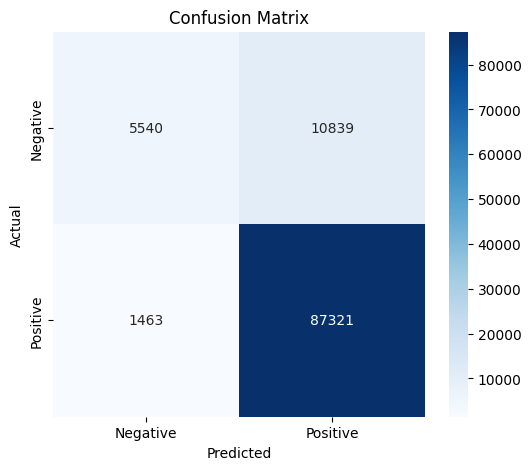

In [ ]:
#This uses the trained model to predict sentiment on the test set.
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Print the accuraccy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.883019693238116


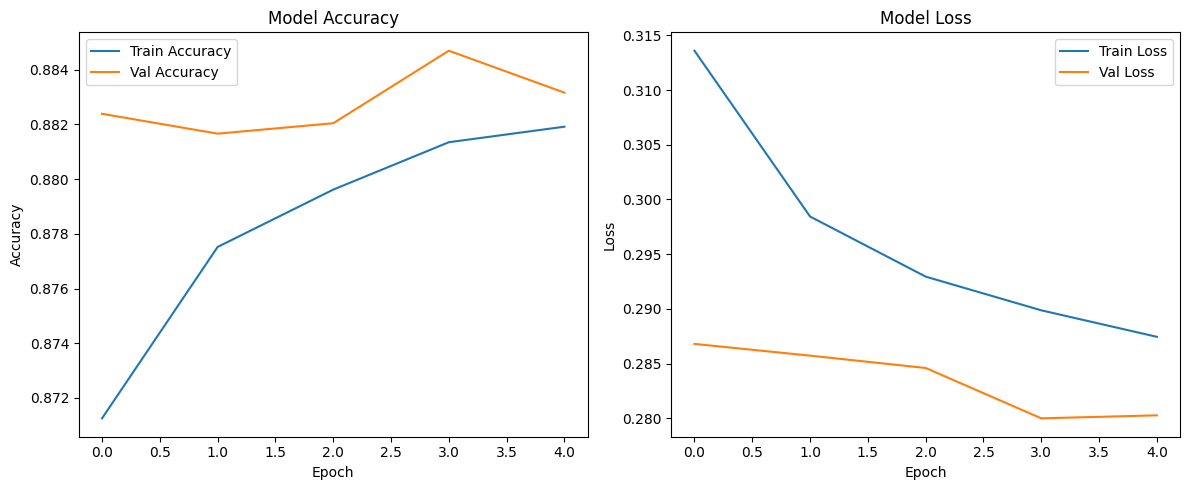

In [ ]:
#This code shows the model's accuracy and loss during training
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
